<a href="https://colab.research.google.com/github/SMITamim/Agaile-software-development-Pros-and-cons/blob/main/Agaile_software_development_Pros_and_cons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

In [9]:
import chardet

with open("Survey-Responses.csv", "rb") as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)

print(result['encoding'])


None


In [14]:
data = pd.read_csv("Survey-Responses1.csv",encoding='cp1252')

In [15]:
data.shape


(42, 12)

In [16]:
data.head()

,Timestamp,What is your name?,What is your designation?,How many years of experience do you have in software development?,Are you familiar with Agile Software Development methods such as XP and Scrum?,Which Agile Software Development method do you have experience with?,Which Agile Software Development method do you prefer?,Choose the most relevant reason for your preference:,What challenges or difficulties have you faced while implementing or practicing your preferred method?,What are the potential drawbacks or limitations you have experienced with agile software development methods?,What are the common communication and collaboration challenges faced by teams in agile software development?,How well do agile practices scale to larger teams or projects within your organization?
0,6/2/2023 22:07:04,Sakib Oyan,Software Engineer,1-2 Years,Yes,Scrum,Scrum,Alignment with iterative and incremental devel...,"Balancing priorities and workload, Ensuring co...",Challenges in scaling agile practices to large...,Issues in coordinating work across distributed...,Agile practices face significant challenges wh...
1,6/2/2023 22:21:19,Barshan Ghosh,Data analyst,0-1 Years,Yes,XP (Extreme Programming),XP (Extreme Programming),"Emphasis on engineering practices and quality,...","Managing changing requirements effectively, Ba...",Difficulty in estimating project timelines and...,Difficulties in aligning team members' underst...,"Agile practices scale well, and we have succes..."
2,6/3/2023 1:44:18,Mijanur Rahman Shovon,SQA,0-1 Years,Yes,Scrum,Scrum,Alignment with iterative and incremental devel...,Managing changing requirements effectively,Limited predictability or difficulty meeting s...,Difficulties in aligning team members' underst...,"Agile practices scale well, and we have succes..."
3,6/3/2023 8:45:31,Rakib,Central control operator,0-1 Years,Yes,XP (Extreme Programming),XP (Extreme Programming),"Emphasis on engineering practices and quality,...",Balancing priorities and workload,Difficulty in estimating project timelines and...,Lack of clear and consistent communication,Scaling agile practices presents some challeng...
4,6/3/2023 15:24:47,Maruf Hasan Raj,Jr. SOFTWARE ENGINEER ( Quality Assurance),0-1 Years,Yes,Scrum,Scrum,"Emphasis on engineering practices and quality,...","Managing changing requirements effectively, Ba...",Difficulty in estimating project timelines and...,"Lack of clear and consistent communication, Di...",Scaling agile practices presents some challeng...


In [17]:
data.describe()

,Timestamp,What is your name?,What is your designation?,How many years of experience do you have in software development?,Are you familiar with Agile Software Development methods such as XP and Scrum?,Which Agile Software Development method do you have experience with?,Which Agile Software Development method do you prefer?,Choose the most relevant reason for your preference:,What challenges or difficulties have you faced while implementing or practicing your preferred method?,What are the potential drawbacks or limitations you have experienced with agile software development methods?,What are the common communication and collaboration challenges faced by teams in agile software development?,How well do agile practices scale to larger teams or projects within your organization?
count,42,36,42,42,42,42,42,42,42,42,42,42
unique,42,36,31,3,2,3,3,12,12,10,7,8
top,6/2/2023 22:07:04,Sakib Oyan,Software Engineer,1-2 Years,Yes,Scrum,Scrum,Flexibility in handling changing requirements,Balancing priorities and workload,Difficulty in estimating project timelines and...,Issues in coordinating work across distributed...,Scaling agile practices presents some challeng...
freq,1,1,7,18,41,28,34,9,12,10,12,24


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                         --------------  ----- 
 0   Timestamp                                                                                                      42 non-null     object
 1   What is your name?                                                                                             36 non-null     object
 2   What is your designation?                                                                                      42 non-null     object
 3   How many years of experience do you have in software development?                                              42 non-null     object
 4   Are you familiar with Agile Software Development methods s

In [19]:
print(data.isnull().sum())

Timestamp                                                                                                        0
What is your name?                                                                                               6
What is your designation?                                                                                        0
How many years of experience do you have in software development?                                                0
Are you familiar with Agile Software Development methods such as XP and Scrum?                                   0
Which Agile Software Development method do you have experience with?                                             0
Which Agile Software Development method do you prefer?                                                           0
Choose the most relevant reason for your preference:                                                             0
What challenges or difficulties have you faced while implementing or practicing 

In [20]:
data = data.dropna()


In [21]:
print(data.columns)



Index(['Timestamp', 'What is your name?', 'What is your designation?',
       'How many years of experience do you have in software development?',
       'Are you familiar with Agile Software Development methods such as XP and Scrum?',
       'Which Agile Software Development method do you have experience with?',
       'Which Agile Software Development method do you prefer?',
       'Choose the most relevant reason for your preference:',
       'What challenges or difficulties have you faced while implementing or practicing your preferred method?',
       'What are the potential drawbacks or limitations you have experienced with agile software development methods?',
       'What are the common communication and collaboration challenges faced by teams in agile software development?',
       'How well do agile practices scale to larger teams or projects within your organization?'],
      dtype='object')


In [22]:
data['What is your name?'] = data['What is your name?'].astype('category')
data['What is your designation?'] = data['What is your designation?'].astype('category')
data['How many years of experience do you have in software development?'] = data['How many years of experience do you have in software development?'].astype('category')
data['Are you familiar with Agile Software Development methods such as XP and Scrum?'] = data['Are you familiar with Agile Software Development methods such as XP and Scrum?'].astype('category')
data['Which Agile Software Development method do you have experience with?'] = data['Which Agile Software Development method do you have experience with?'].astype('category')
data['Which Agile Software Development method do you prefer?'] = data['Which Agile Software Development method do you prefer?'].astype('category')
data['Choose the most relevant reason for your preference:'] = data['Choose the most relevant reason for your preference:'].astype('category')
data['What challenges or difficulties have you faced while implementing or practicing your preferred method?'] = data['What challenges or difficulties have you faced while implementing or practicing your preferred method?'].astype('category')
data['What are the potential drawbacks or limitations you have experienced with agile software development methods?'] = data['What are the potential drawbacks or limitations you have experienced with agile software development methods?'].astype('category')
data['What are the common communication and collaboration challenges faced by teams in agile software development?'] = data['What are the common communication and collaboration challenges faced by teams in agile software development?'].astype('category')
data['How well do agile practices scale to larger teams or projects within your organization?'] = data['How well do agile practices scale to larger teams or projects within your organization?'].astype('category')


df = pd.DataFrame(data)
print(data.dtypes)

Timestamp                                                                                                          object
What is your name?                                                                                               category
What is your designation?                                                                                        category
How many years of experience do you have in software development?                                                category
Are you familiar with Agile Software Development methods such as XP and Scrum?                                   category
Which Agile Software Development method do you have experience with?                                             category
Which Agile Software Development method do you prefer?                                                           category
Choose the most relevant reason for your preference:                                                             category
What challenges or diffi

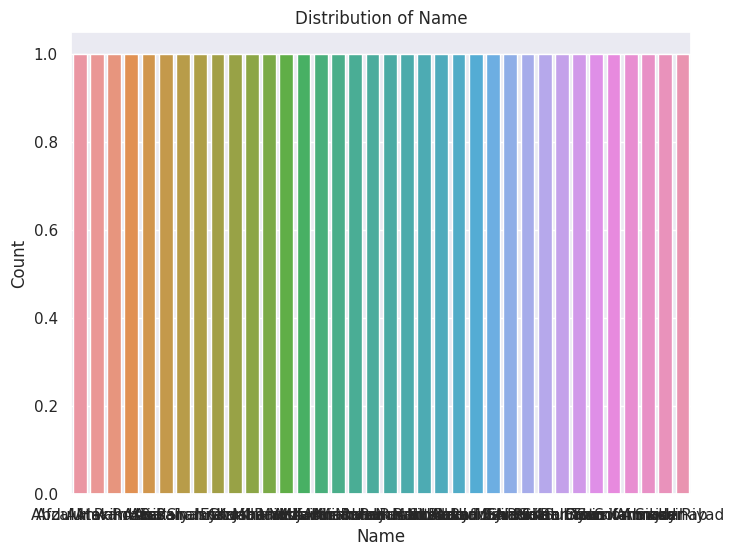

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for 'Please select your gender'
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your name?', data=data)
plt.title("Distribution of Name")
plt.xlabel("Name")
plt.ylabel("Count")
plt.show()

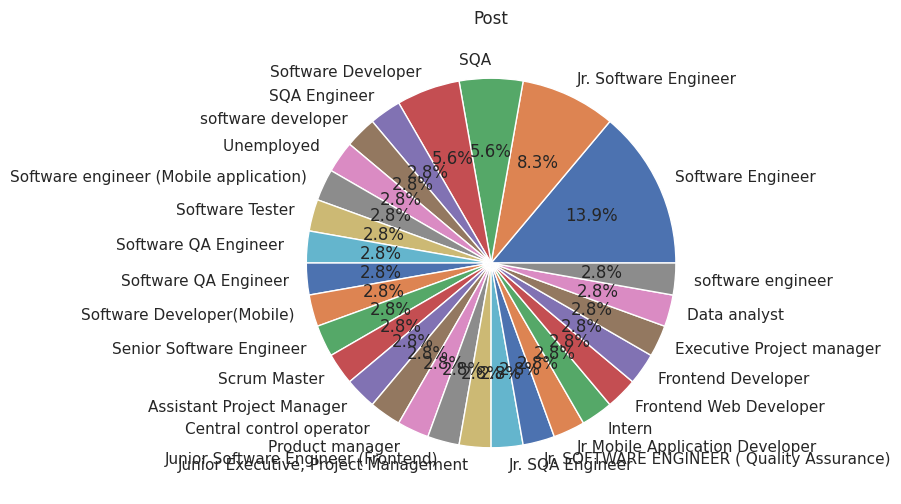

In [25]:
import matplotlib.pyplot as plt

# Pie chart for 'Which mobile banking services are you using?'
plt.figure(figsize=(8, 6))
data['What is your designation?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Post")
plt.ylabel("")
plt.show()

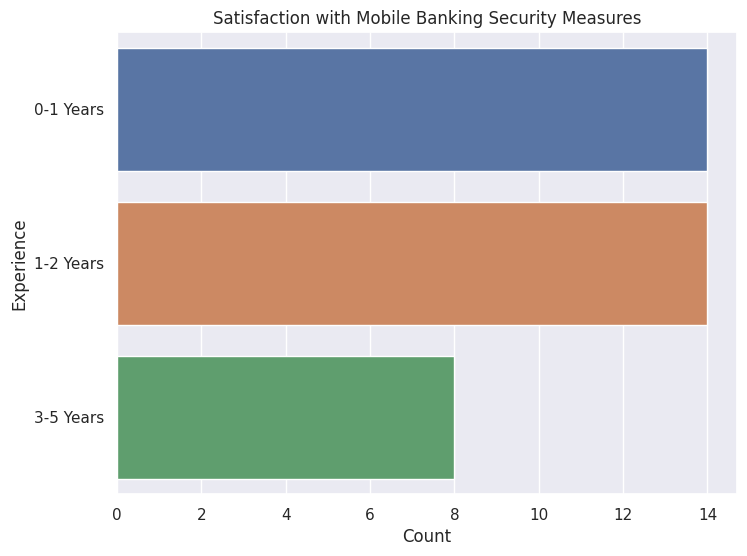

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Horizontal bar plot for 'How satisfied are you with the security measures in place for mobile banking?'
plt.figure(figsize=(8, 6))
sns.countplot(y='How many years of experience do you have in software development?', data=data)
plt.title("Satisfaction with Mobile Banking Security Measures")
plt.xlabel("Count")
plt.ylabel("Experience")
plt.show()

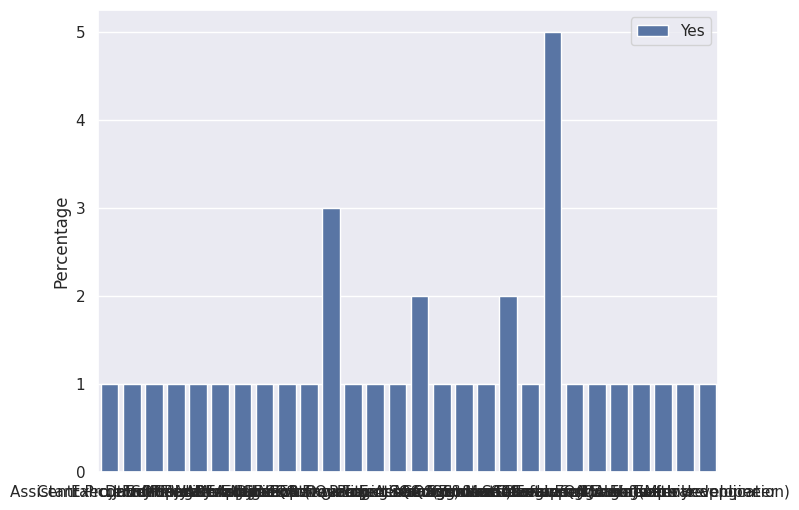

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked bar plot for 'Please select your gender' and 'Are you using mobile banking applications?'
plt.figure(figsize=(8, 6))
sns.countplot(x='What is your designation?', hue='Are you familiar with Agile Software Development methods such as XP and Scrum?', data=data)
plt.title("") #Graph title
plt.xlabel("") #X label
plt.ylabel("Percentage")
plt.legend(title="")
plt.show()

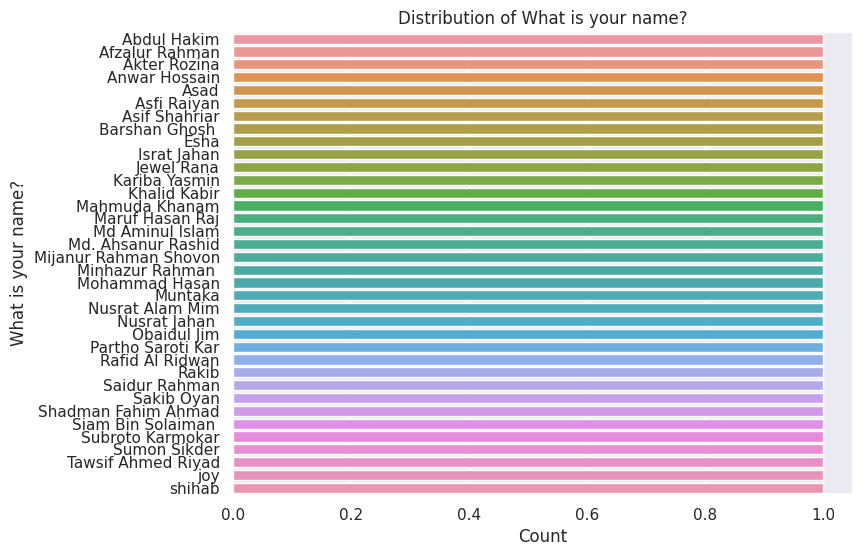

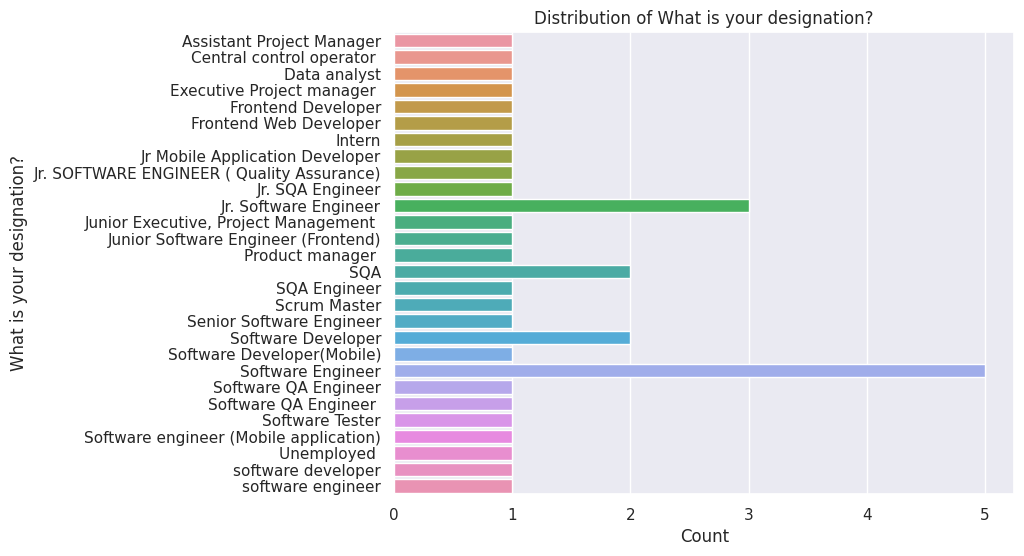

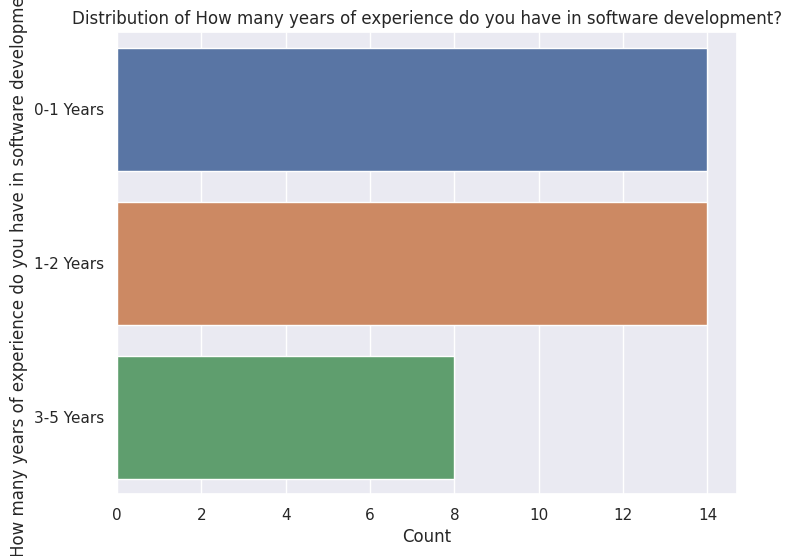

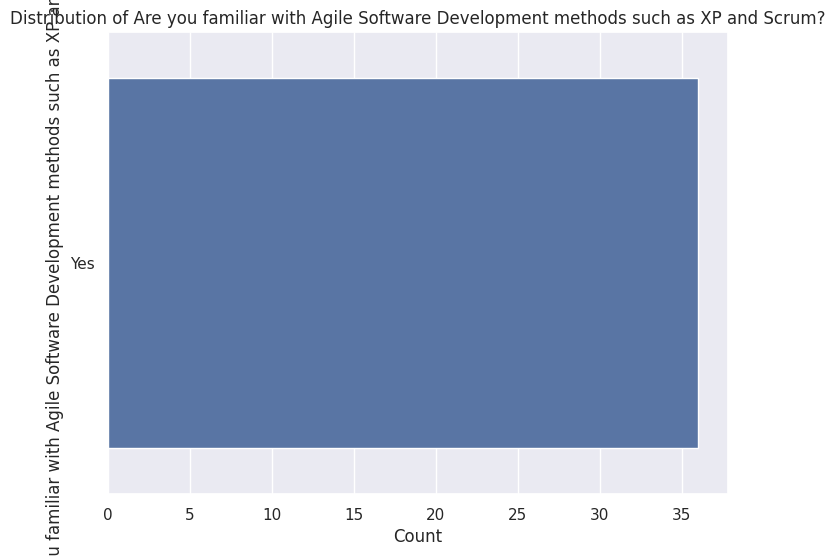

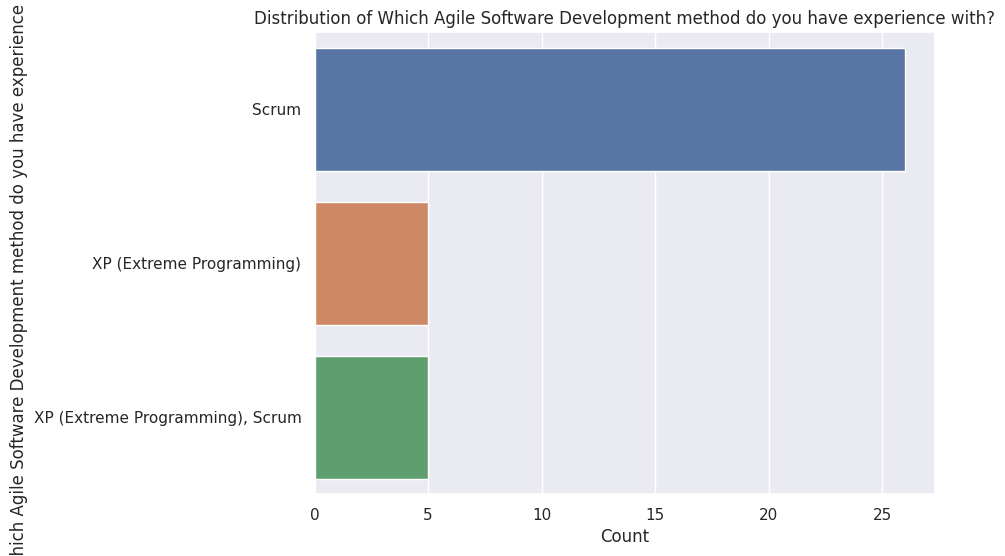

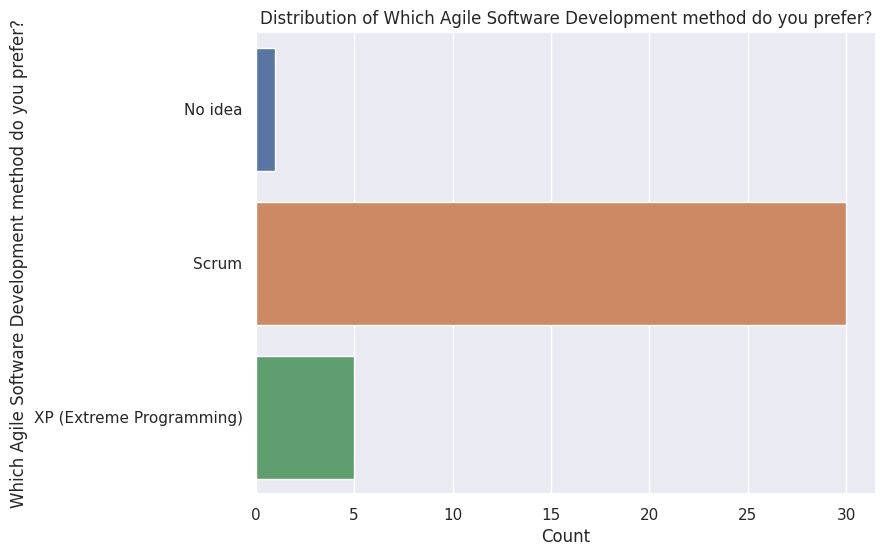

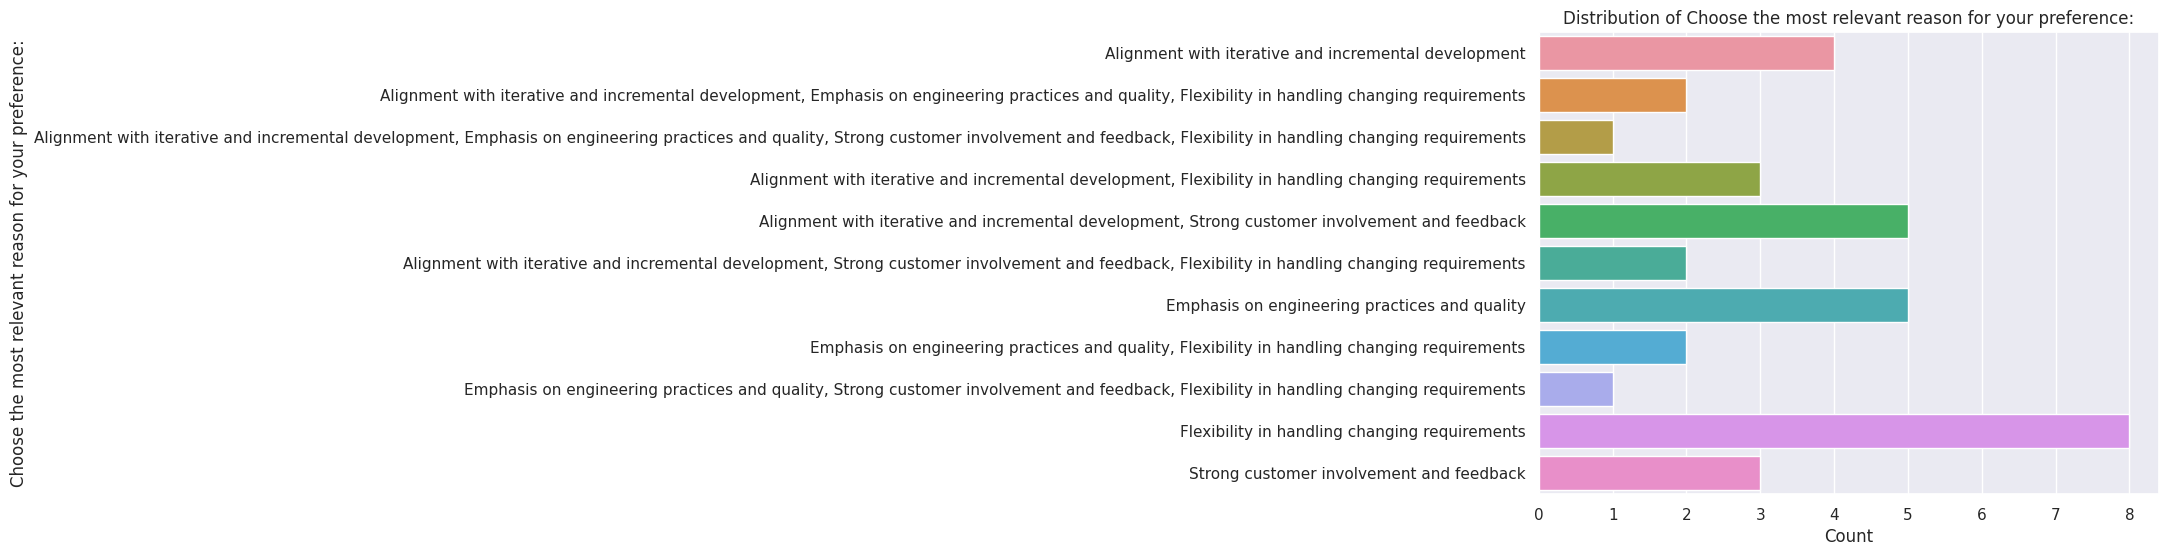

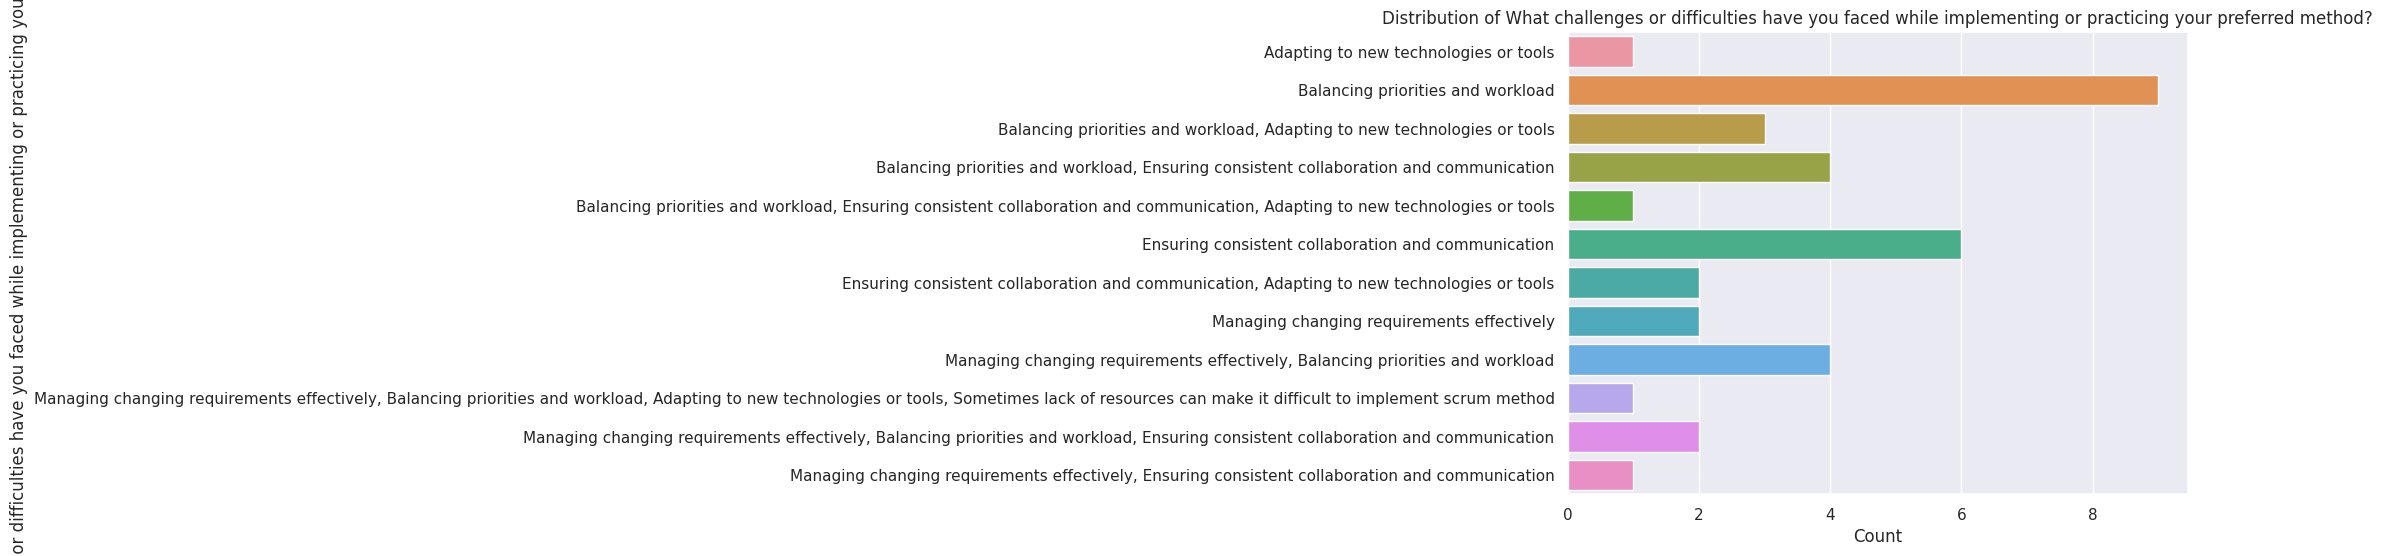

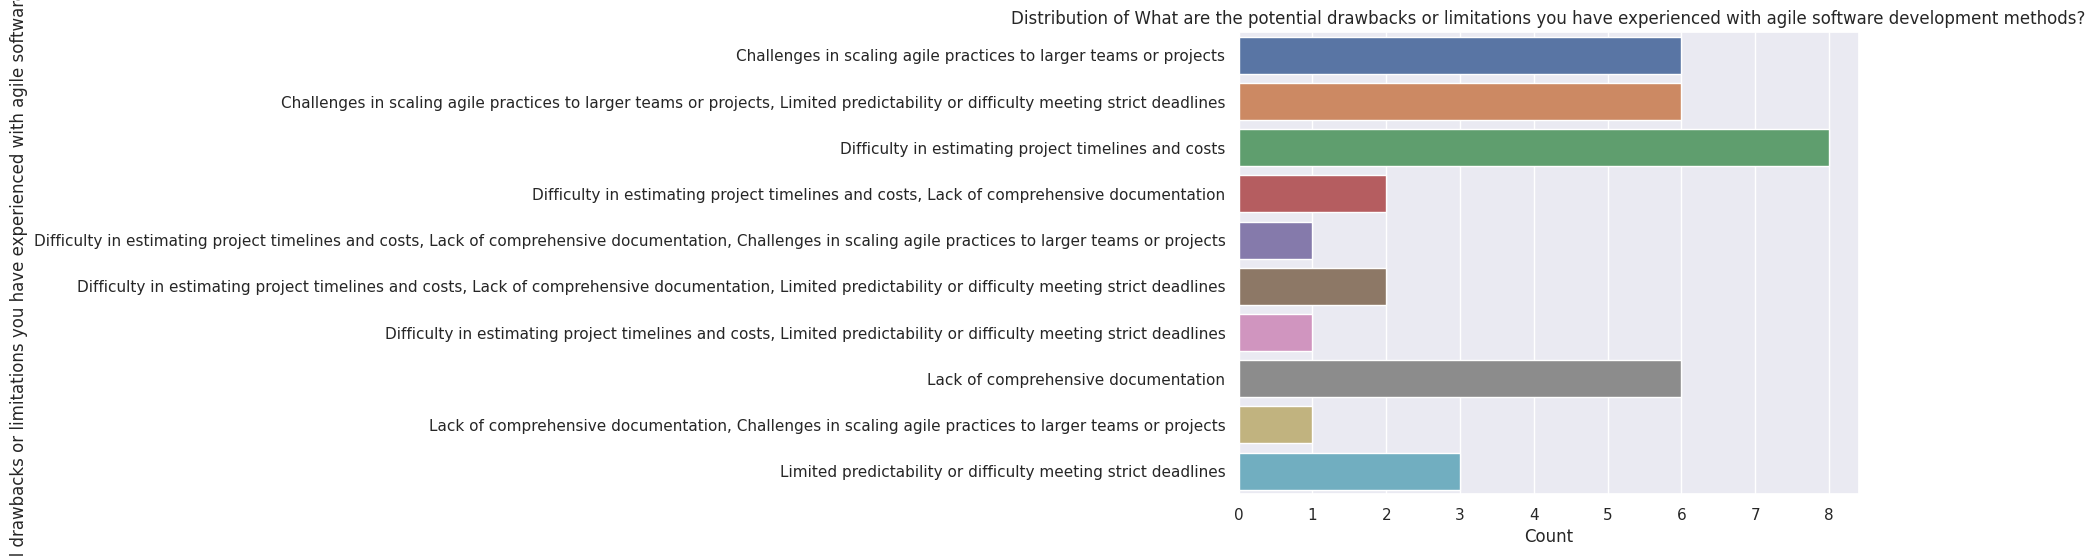

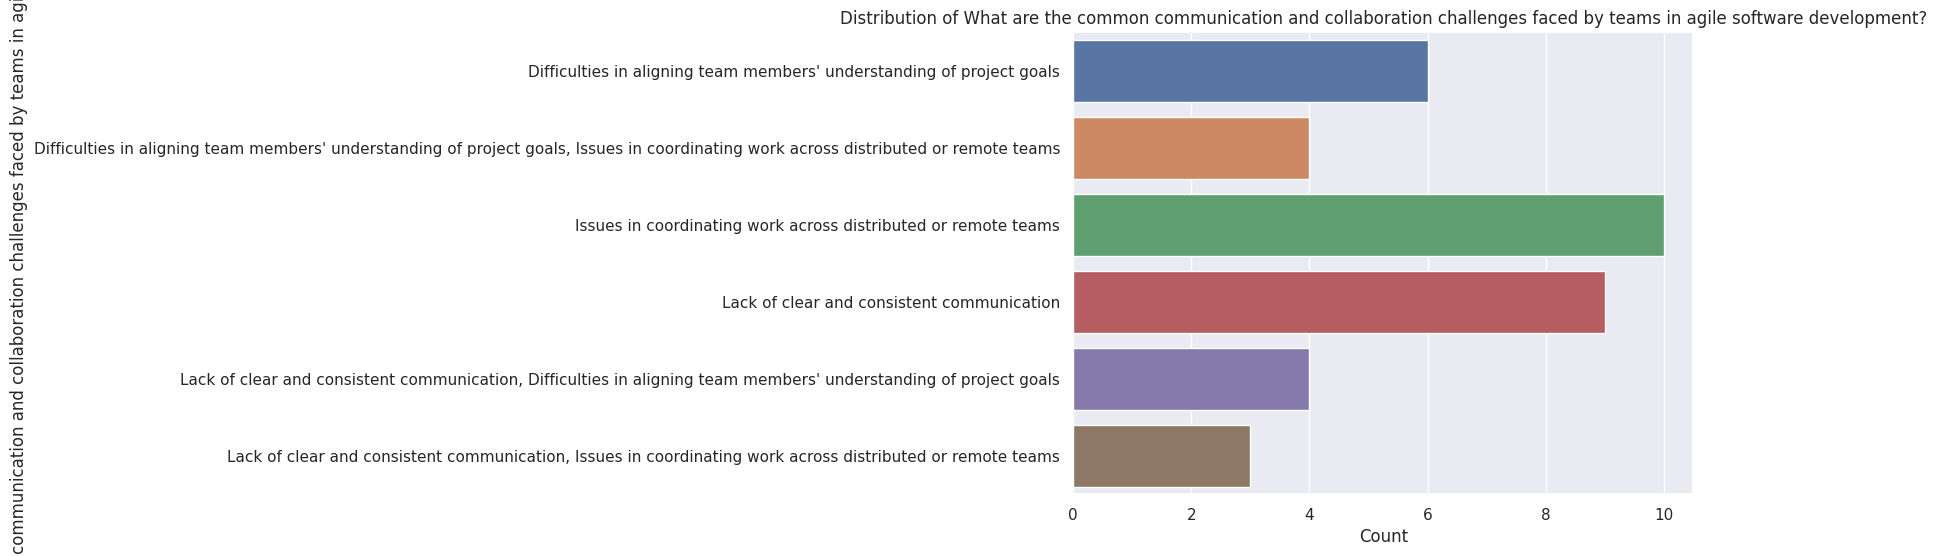

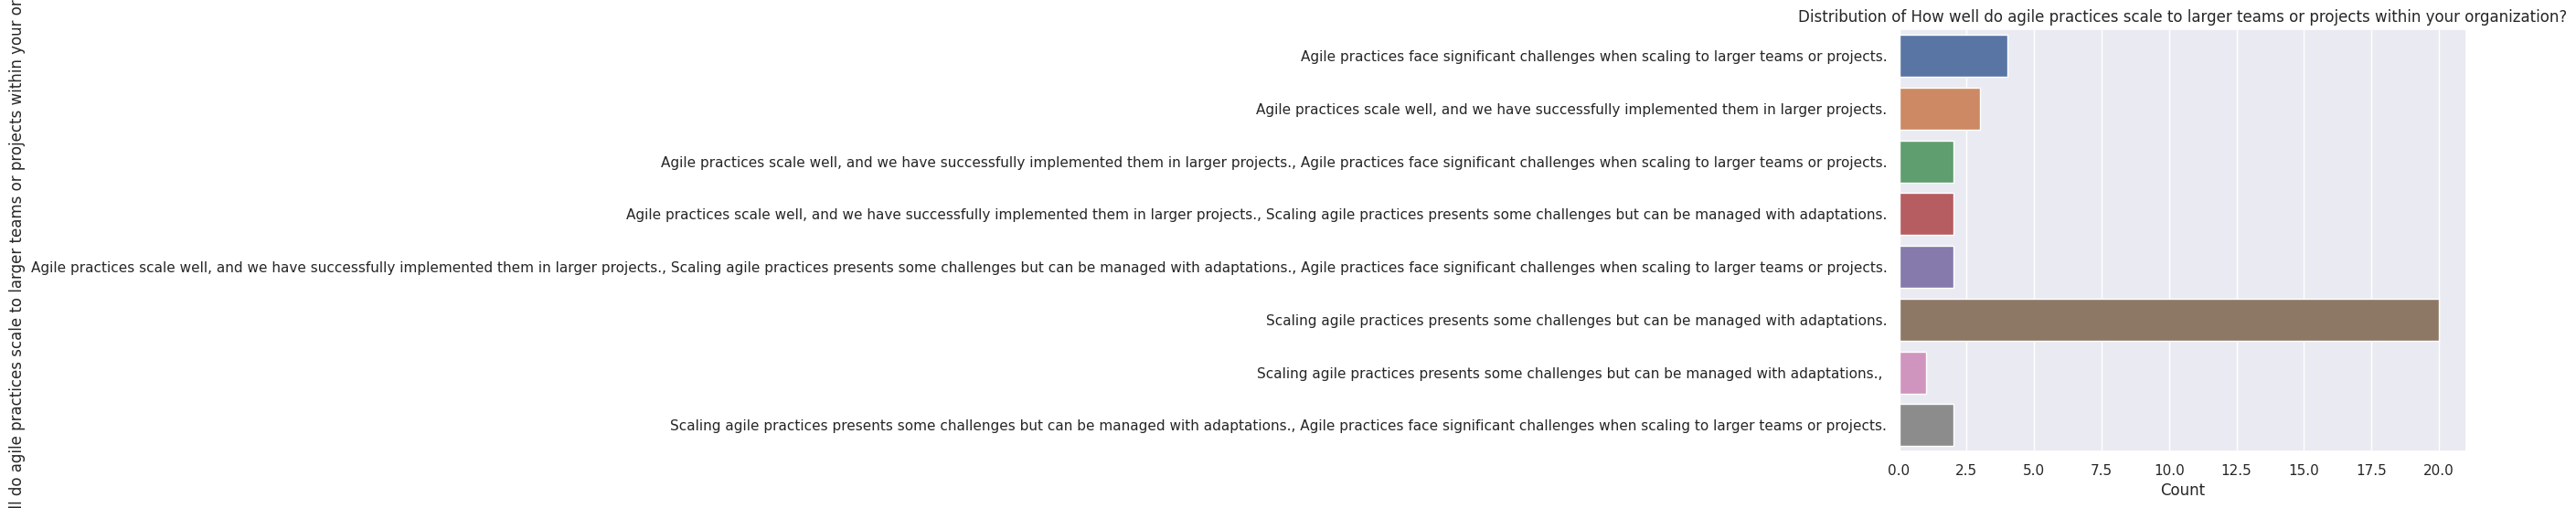

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graph of all column
for column in data.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()